In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df1 = df.drop(['PassengerId','Name','Fare','Embarked','Ticket'], axis=1)

In [7]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,0,3,male,22.0,1,0,NaN
1,1,1,female,38.0,1,0,C85
2,1,3,female,26.0,0,0,NaN
3,1,1,female,35.0,1,0,C123
4,0,3,male,35.0,0,0,NaN


In [8]:
#checking our data
df1.shape

(891, 7)

In [9]:
# df1["Ticket"]

In [10]:
#look for our missing values 
df1_null = df1.isna()

In [11]:
len(df1_null)

891

In [12]:
df1_null.sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
dtype: int64

In [13]:
df1_null.sum()/len(df)*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Cabin       77.104377
dtype: float64

In [14]:
#dealing with missing data 
# 1. mean 
# 2. mode
# 3. Median
# 4. drop the miss rows or column 

In [15]:
#summary statistics
df1.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [16]:
# fill age with the mean 
# get the meanmode and median of the columns

In [17]:
#find the mode 
df1["Age"].mode()

0    24.0
dtype: float64

In [18]:
 df1['Age'].count()

714

In [19]:
#check the number of people who are of age 24
df_24 = df1["Age"] == 24
df[df_24].count()

PassengerId    30
Survived       30
Pclass         30
Name           30
Sex            30
Age            30
SibSp          30
Parch          30
Ticket         30
Fare           30
Cabin           9
Embarked       30
dtype: int64

In [20]:
#guy aged 24 
df1[df1.Age == 24 ].count()['Age']

30

In [21]:
#fill in the age 

# df1['Age']=df1['Age'].fillna((df1['Age'].mode(),inplace=True))

In [22]:
mode_value=df1['Age'].mode()
df1['Age']=df1['Age'].fillna((df1['Age'].mode()[0] ))

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Cabin     204 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [24]:
#inspecting Age 
df1['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [25]:
df1['Age'].mode()

0    24.0
dtype: float64

In [26]:
df['Age'].mean()

29.69911764705882

In [27]:
# give me the number of males and females those who survived and those who didn't 
df1[['Sex','Survived']].groupby(["Sex"], as_index=False).count()

,Sex,Survived
0,female,314
1,male,577


In [28]:
#cabin has 77% missing this might no be of any help, lets drop it 
df2 = df1.drop(["Cabin"], axis =1)

In [29]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [30]:
df2.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [31]:
# checking for categorical values
df2.describe(include=['O'])

,Sex
count,891
unique,2
top,male
freq,577


In [32]:
#we have categorical variables; we need to convert them to numerical values 
#let's converrt age to numerical value 

df2["Sex"] = pd.Categorical(df2["Sex"])
sex_categories = df2.Sex.cat.categories
df2["Sex"] = df2.Sex.cat.codes

In [33]:
df2['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int8

In [34]:
df2.dtypes

Survived      int64
Pclass        int64
Sex            int8
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [35]:
df2.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
df2.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch
886,0,2,1,27.0,0,0
887,1,1,0,19.0,0,0
888,0,3,0,24.0,1,2
889,1,1,1,26.0,0,0
890,0,3,1,32.0,0,0


In [37]:
df2.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [38]:
df2.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [39]:
df2[['Pclass','Survived']].groupby(["Pclass"], as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [40]:
df2.dtypes

Survived      int64
Pclass        int64
Sex            int8
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [41]:
#histogram for male and females

plt.hist(df2['Sex'])


NameError: name 'plt' is not defined

In [42]:
plt.plot(['Sex'])
plt.hist(df['Sex'])
plt.show

NameError: name 'plt' is not defined

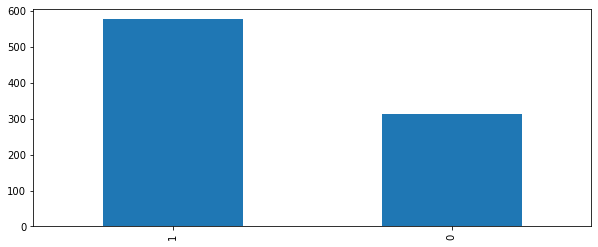

In [43]:
plot = df2['Sex'].value_counts().plot(kind='bar',
                                    figsize=(10,4)   )

In [44]:
#plot sex and survived 

# plot Pclass and survived 

# correlation plot 



In [45]:
df2.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

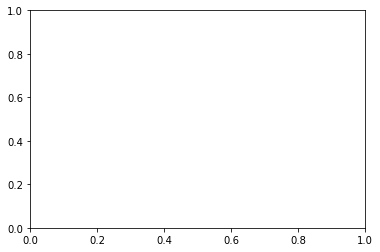

In [46]:
# Ploting males and females and the count in bar graph 
import matplotlib.pyplot as plt
# plt.plot(df2["Sex"])
plt.bar(df2['Sex'], df2.groupby("Sex").count())
plt.show

In [47]:
import seaborn as sns
sns.barplot(x ="")

ValueError: Could not interpret input ''

In [48]:
# let's use logistic model since our Y or outcome is categoriacl i.e 0,1
from sklearn.linear_model import LogisticRegression